In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
test_ids = df_test['PassengerId']

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
print("Total number of rows in training data ", df.shape[0])
print("Total number of columns in training data ", df.shape[1])
print("Total number of rows in test data ", df_test.shape[0])
print("Total number of columns in test data ", df_test.shape[1])

Total number of rows in training data  891
Total number of columns in training data  12
Total number of rows in test data  418
Total number of columns in test data  11


In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt

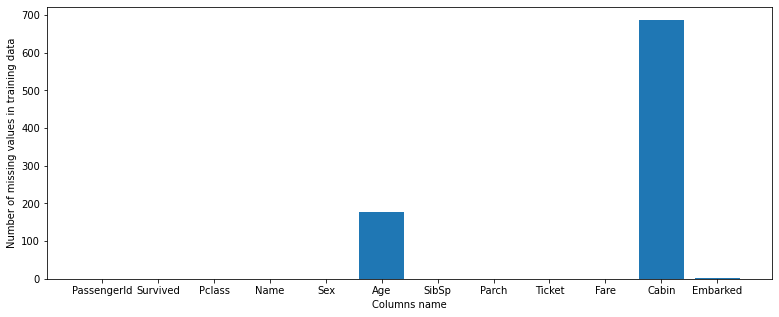

In [8]:
plt.figure(figsize = (13,5))
plt.bar(df.columns, df.isna().sum())
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in training data")
plt.show()

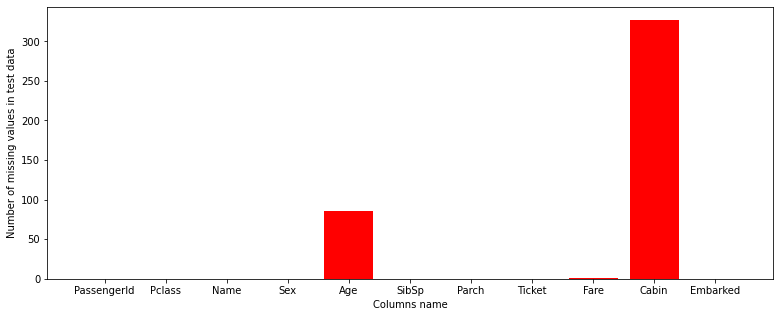

In [9]:
plt.figure(figsize = (13,5))
plt.bar(df_test.columns, df_test.isnull().sum().values, color = 'red')
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in test data")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


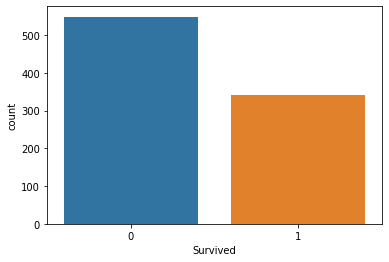

In [10]:
sns.countplot('Survived', data = df)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


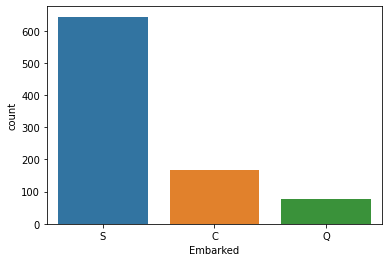

In [11]:
sns.countplot('Embarked', data = df)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

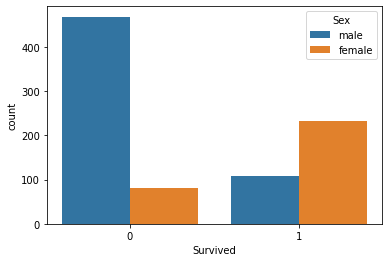

In [12]:
sns.countplot('Survived', hue = 'Sex', data = df)
plt.plot()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


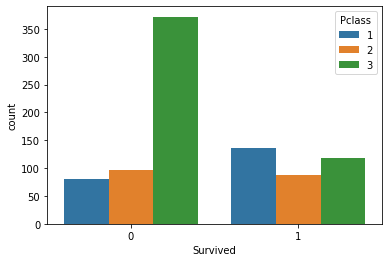

In [13]:
sns.countplot("Survived", hue = 'Pclass', data = df)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


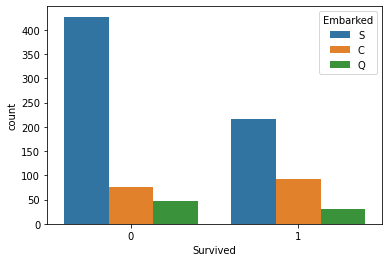

In [14]:
sns.countplot('Survived', hue = 'Embarked', data = df)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


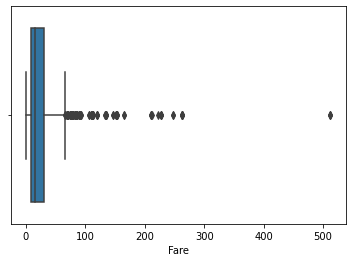

In [15]:
sns.boxplot('Fare', data = df)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


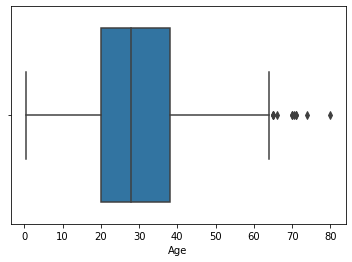

In [16]:
sns.boxplot('Age', data = df)
plt.show()

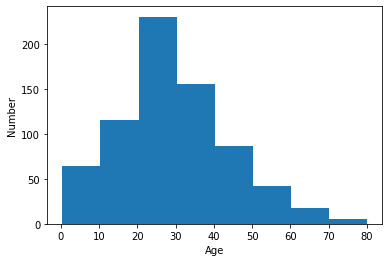

In [17]:
interval = 10
value_for_bin = np.ceil((df.Age.max() - df.Age.min()) / interval).astype(int)

plt.hist(df.Age, bins = value_for_bin)
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()

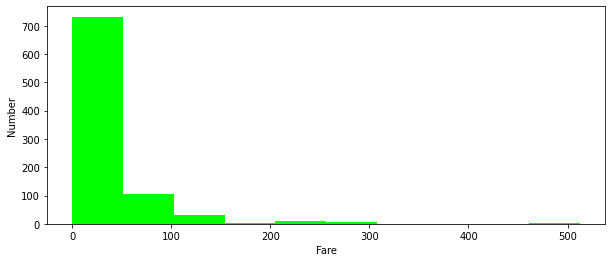

In [18]:
plt.figure(figsize = (10,4))
plt.hist(df.Fare, bins = 10, color = 'lime')
plt.xlabel("Fare")
plt.ylabel("Number")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


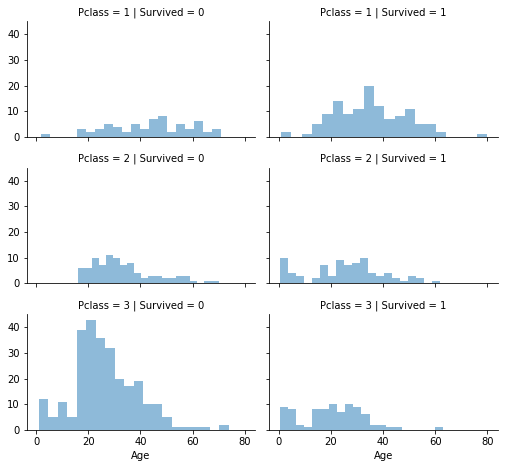

In [19]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


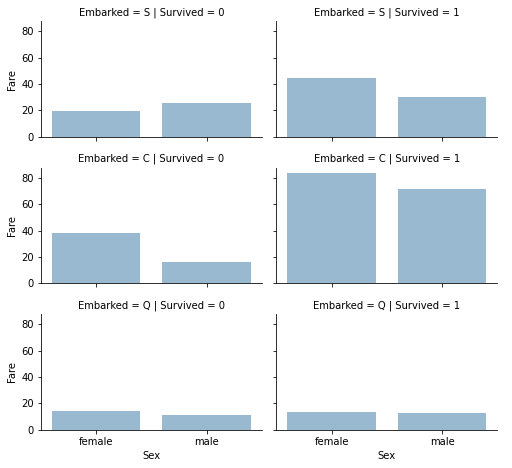

In [20]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()

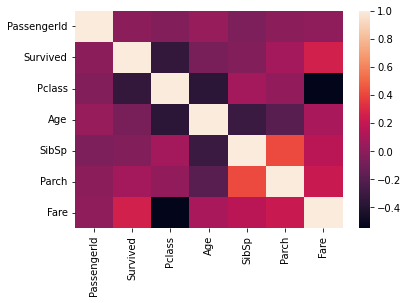

In [21]:
corr_train = df.corr()
sns.heatmap(corr_train)
plt.show()

In [22]:
((df.groupby(['Sex','Survived']).Survived.count() * 100) / df.groupby('Sex').Survived.count())

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

In [23]:
(df.groupby(['Pclass','Survived']).Survived.count() * 100) / df.groupby('Pclass').Survived.count()

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

In [24]:
(df.groupby(['Embarked','Survived']).Survived.count() * 100) / df.groupby('Embarked').Survived.count()

Embarked  Survived
C         0           44.642857
          1           55.357143
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: Survived, dtype: float64

In [25]:
df.groupby(by=['Survived']).mean()["Age"]

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [26]:
def clean(data):
    data.loc[data['Parch'] >= 3, 'Age'] = data.loc[data['Parch'] >= 3, 'Age'].fillna(data[data['Parch'] >= 3].mean())
    data.loc[data['SibSp'] > 1, 'Age'] = data.loc[data['SibSp'] > 1, 'Age'].fillna(data[data['SibSp'] > 1]['Age'].mean())
    data.loc[data['Name'].str.contains('Miss'), 'Age'] = data.loc[data['Name'].str.contains('Miss'), 'Age'].fillna(data[data['Name'].str.contains("Miss")]['Age'].mean())
    data.loc[data['Name'].str.contains('Mrs'), 'Age'] = data.loc[data['Name'].str.contains('Mrs'), 'Age'].fillna(data[data['Name'].str.contains("Mrs")]['Age'].mean())
    data.loc[data['Name'].str.contains('Master'), 'Age'] = data.loc[data['Name'].str.contains('Master'), 'Age'].fillna(data[data['Name'].str.contains("Master")]['Age'].mean())
    data.loc[data['Name'].str.contains('Mr.'), 'Age'] = data.loc[data['Name'].str.contains('Mr.'), 'Age'].fillna(data[data['Name'].str.contains("Mr.")]['Age'].mean())
    data.loc[data['Name'].str.contains('Dr.'), 'Age'] = data.loc[data['Name'].str.contains('Dr.'), 'Age'].fillna(data[data['Name'].str.contains("Dr.")]['Age'].mean())
    data.Embarked.fillna('S', inplace = True)
    data.Fare.fillna(data.Fare.mean(), inplace = True)
    data.drop(['Cabin', 'PassengerId', "Ticket"], axis = 1, inplace = True)
    data.Age.fillna(data.Age.mean(), inplace=True)
    return data

In [27]:
df = clean(df)
df_test = clean(df_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [28]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['Sex', 'Embarked']

for col in cols:
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.transform(df_test[col])
    print(le.classes_)

['female' 'male']
['C' 'Q' 'S']


In [30]:
df['Alone'] = df.SibSp + df.Parch
df_test['Alone'] = df_test.SibSp + df_test.Parch

df.Alone = df.Alone.apply(lambda x: 1 if x == 0 else 0)
df_test.Alone = df_test.Alone.apply(lambda x: 1 if x == 0 else 0)

In [31]:
df.drop(['SibSp','Parch'], axis = 1, inplace = True)
df_test.drop(['SibSp','Parch'], axis = 1, inplace = True)

In [32]:
def title(data):
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    return data


In [33]:
df = title(df)
df_test = title(df_test)

In [34]:
pd.crosstab(df['Title'], df['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [35]:
def newtitle(data):
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                           'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    return data

In [36]:
df = newtitle(df)
df_test = newtitle(df_test)

In [37]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [38]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
def cleantitle(data):
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)
    return data

In [39]:
df = cleantitle(df)
df_test = cleantitle(df_test)

In [40]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,0,0,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,2,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,2,0,3
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,2,1,1


In [41]:
df = df.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

In [42]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,1,22.0,7.2500,2,0,1
1,1,1,0,38.0,71.2833,0,0,3
2,1,3,0,26.0,7.9250,2,1,2
3,1,1,0,35.0,53.1000,2,0,3
4,0,3,1,35.0,8.0500,2,1,1


In [43]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.508621
1,"(16.336, 32.252]",0.397333
2,"(32.252, 48.168]",0.321875
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [44]:
def ageband(dataset):
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    return dataset
    

In [45]:
df = ageband(df)
df_test = ageband(df_test)

In [46]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title,AgeBand
0,0,3,1,1.0,7.2500,2,0,1,"(16.336, 32.252]"
1,1,1,0,2.0,71.2833,0,0,3,"(32.252, 48.168]"
2,1,3,0,1.0,7.9250,2,1,2,"(16.336, 32.252]"
3,1,1,0,2.0,53.1000,2,0,3,"(32.252, 48.168]"
4,0,3,1,2.0,8.0500,2,1,1,"(32.252, 48.168]"


In [47]:
df = df.drop(['AgeBand'], axis=1)


In [48]:
df['Age*Class'] = df.Age * df.Pclass
df_test['Age*Class'] = df_test.Age * df_test.Pclass

In [49]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [50]:
def cleanFare(dataset):
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    return dataset

In [51]:
df = cleanFare(df)
df_test = cleanFare(df_test)

In [52]:
df = df.drop(['FareBand'], axis=1)


In [53]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title,Age*Class
0,0,3,1,1.0,0,2,0,1,3.0
1,1,1,0,2.0,3,0,0,3,2.0
2,1,3,0,1.0,1,2,1,2,3.0
3,1,1,0,2.0,3,2,0,3,2.0
4,0,3,1,2.0,1,2,1,1,6.0


In [54]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Alone,Title,Age*Class
0,3,1,2.0,0,1,1,1,6.0
1,3,0,2.0,0,2,0,3,6.0
2,2,1,3.0,1,1,1,1,6.0
3,3,1,1.0,1,2,1,1,3.0
4,3,0,1.0,1,2,0,3,3.0


# Model building and Evaluating

We will use:
- Logistic Regression
- KNN
- SVM
- Naive Bayes
- Decision Tree
- Random Forrest
- Perceptron
- Artificial NN
- RVM

In [55]:
X_train = df.drop("Survived", axis=1)
y_train = df["Survived"]
X_test = df_test.copy()


In [56]:
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Logistic Regression

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [59]:
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

79.01

### SVM

In [60]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

78.34

### KNN

In [61]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

84.4

### Naive Bayes

In [62]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

72.84

### Perception

In [63]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

78.0

### Linear SVC

In [64]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


78.56

### SGD

In [65]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

75.08

### Decision Tree

In [66]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

87.21

### Random Forest

In [67]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

87.21

## Model evaluation

In [68]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.21
8,Decision Tree,87.21
1,KNN,84.40
2,Logistic Regression,79.01
7,Linear SVC,78.56
0,Support Vector Machines,78.34
5,Perceptron,78.00
6,Stochastic Gradient Decent,75.08
4,Naive Bayes,72.84


# Submission

In [69]:
submission = pd.DataFrame({"PassengerId": test_ids.values,"Survived": y_pred})

In [70]:
submission.to_csv('final_submission.csv', index = False)